In [1]:
# This tutorial will use Monte Carlo methods to simulate the output of a
# Photomultiplier Tube (PMT) once triggered by the detection of one or more
# photons.

In [2]:
# This example follows notes posted online which you can find at the following
# url: http://superk.physics.sunysb.edu/~mcgrew/phy310/lectures/phy310-lecture-06-2007.pdf
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [4]:
# In all Monte Carlo simulations it is necessary to generate random or
# pseudo-random numbers.  The Python command 'np.random.uniform()'
# from the NumPy module generates random numbers uniformly distributed 
# between zero and one. 
np.random.uniform()

0.7961852081589491

In [5]:
# First, suppose N photons hit the photocathode.  Determine the number of
# photoelectrons (pe) that are generated.  Assume that the incoming light is
# 400 nm and that the quantum efficiency of the photocathode is 0.23.
#(Following  http://superk.physics.sunysb.edu/~mcgrew/phy310/lectures/phy310-lecture-06-2007.pdf)
N = 2363
QE = 0.23
pe = 0
for i in range(N):
    if np.random.uniform() < QE:
        pe += 1
pe

546

mean: 1998.539
variance: 1942.5470260260263


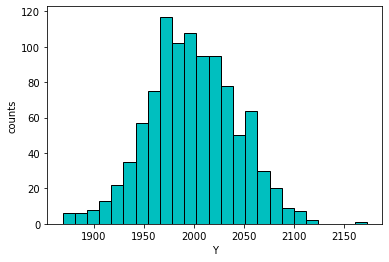

In [6]:
# When an electron with energy E hits a Dynode the average number of
# secondary electrons liberated is alpha*E (i.e. number of secondary electrons
# is proportional to the energy of the incoming electron) where alpha is a
# contant.  Since we are counting electrons, the distribution of liberated
# electrons follows the Poisson distribution.  In Python random numbers
# drawn from a Poisson distribution with mean mu are generated using
# poissrnd(mu). As an example, below we generate random integers drawn from
# a Poisson parent distribtuion with mean 2000.
mu = 2000
Ydist = []
for i in range(1000):
    Ydist = Ydist + [np.random.poisson(mu)]
print('mean:', statistics.mean(Ydist))
print('variance:', statistics.stdev(Ydist)**2)
nbins = 25
plt.hist(Ydist, nbins, color = 'c', edgecolor = 'k')
plt.xlabel('Y')
plt.ylabel('counts');

In [8]:
# A photomultiplier tube (PMT) consists of a photocathode followed by a
# series of dynodes maintained at different electric potentials and then
# finally an anode.  When a single photon is incident on the photocathode
# it either produces a photoelectron or it doesn't.  The probability that
# it produces a photoelectron is determined by the quantum efficiency
# QE of the photocathode.  For this exercise we will assume that QE = 0.23.
# If a photoelectron is produced, it is accelerated towards the first dynode by
# means of a potential difference.  We assume that all electrons, whether
# produced at the photocathode or one of the dynodes, start with zero kinetic
# energy.  Therefore, the energy an electron gains is simply its charge times
# the potential difference between its starting and final positions.  When
# an electron collides with a dynode, secondary electrons are produced.  The
# average number of secondary electrons produced is proportional to the energy
# of the incoming electron.  In this problem, we assume that an electron
# accelerated through 20 V will, on average, produce one secondary electron
# upon colliding with the dynode.  Because we are "counting" electrons, the
# distribution of secondary electrons generated will follow a Poisson
# distribution.  

QE = 0.23; # Set the quantum efficeincy of the photocathode
maxi = int(1e4) # Set the number of Monte Carlo iterations
dynode = [0, 150, 300, 450, 600, 750, 850] # Set the number of dynodes and
# their voltages
dist = []
from datetime import datetime
print(datetime.now()) # Print the time at the simulation was started
for i in range(maxi): # This loop runs the Monte Carlo simulation maxi times
    # (10,000 in this case)
    if np.random.uniform() < QE: # Generate a random number between [0, 1] and check to see
        # if it's greater than the quantum efficiency
        electrons = 1 # If true, then a photoelectron is produced
        for j in range(len(dynode)-1): # This loop will examine the secondary
            # electrons produced at each of the dynodes
            mu = electrons*(dynode[j+1]-dynode[j])/20 # Mean number of
            # electrons generated at a dynode determined from the number of
            # incoming electons and the energy of the incoming electrons.
            # One electron accelerated through 20 V will on anverage produce
            # one electron
            electrons = electrons + np.random.poisson(mu)
        dist = dist + [electrons] # Add the total number of electrons detected at
        # the anode for this trial to a 'dist' list.  
print(datetime.now()) 

2021-03-11 11:22:05.176837
2021-03-11 11:22:05.230722


In [9]:
print('The fraction of trials that produced photoelectrons is', len(dist)/maxi)
# Determines what fraction of maxi trials actually
# produced electrons at the PMT anode.  It should come out to be close the
# QE = 0.23.

The fraction of trials that produced photoelectrons is 0.2286


The mean of the distribution was 268264.28783902014


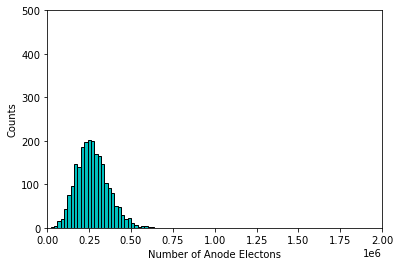

In [10]:
import statistics
print('The mean of the distribution was', statistics.mean(dist))
# Calculate the mean of the distribution
xbins = np.linspace(0, 2e6, 101) # Set bin ranges for the histogram.
# 100 equally-sized bins fron 0 to 2e6.
plt.hist(dist, xbins, color = 'c', edgecolor = 'k') # Plot the histgram of the 
# simulated number of anode electrons
plt.xlim((0, 2e6))
plt.ylim((0, 500))
plt.xlabel('Number of Anode Electons')
plt.ylabel('Counts');

In [13]:
counts, edges = np.histogram(dist, xbins) # Here we use 'np.histogram' to have 
# Python tell us how many counts there are in each of our 100 bins.
counts

array([  0,   1,   5,  16,  21,  43,  76,  97, 146, 140, 185, 198, 202,
       200, 169, 166, 147, 103,  92,  80,  51,  48,  30,  20,  22,  11,
         6,   2,   4,   3,   1,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int64)

In [14]:
# Calculate the centre positions of the bins from the edge locations.
spacing = (edges[1] - edges[0])/2
centres = edges[1:] - spacing
centres

array([  10000.,   30000.,   50000.,   70000.,   90000.,  110000.,
        130000.,  150000.,  170000.,  190000.,  210000.,  230000.,
        250000.,  270000.,  290000.,  310000.,  330000.,  350000.,
        370000.,  390000.,  410000.,  430000.,  450000.,  470000.,
        490000.,  510000.,  530000.,  550000.,  570000.,  590000.,
        610000.,  630000.,  650000.,  670000.,  690000.,  710000.,
        730000.,  750000.,  770000.,  790000.,  810000.,  830000.,
        850000.,  870000.,  890000.,  910000.,  930000.,  950000.,
        970000.,  990000., 1010000., 1030000., 1050000., 1070000.,
       1090000., 1110000., 1130000., 1150000., 1170000., 1190000.,
       1210000., 1230000., 1250000., 1270000., 1290000., 1310000.,
       1330000., 1350000., 1370000., 1390000., 1410000., 1430000.,
       1450000., 1470000., 1490000., 1510000., 1530000., 1550000.,
       1570000., 1590000., 1610000., 1630000., 1650000., 1670000.,
       1690000., 1710000., 1730000., 1750000., 1770000., 17900

Text(0, 0.5, 'Counts')

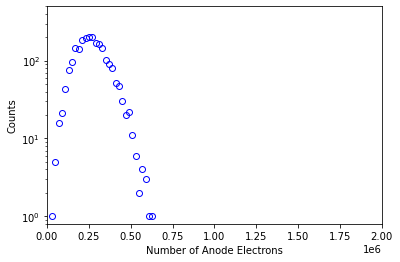

In [15]:
plt.semilogy(centres, counts, 'bo', fillstyle = 'none') # Make a semi-log plot 
# of the counts versus the number of detected anode electrons
plt.xlim((0, 2e6))
plt.ylim((.8, 500))
plt.xlabel('Number of Anode Electrons')
plt.ylabel('Counts')

2021-03-11 11:24:58.852798
2021-03-11 11:24:59.142357
The fraction of trials that produced photoelectrons is 0.8761
The mean of the distribution was 560754.4641022715


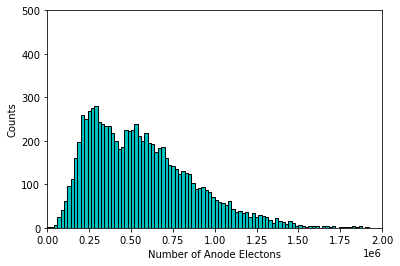

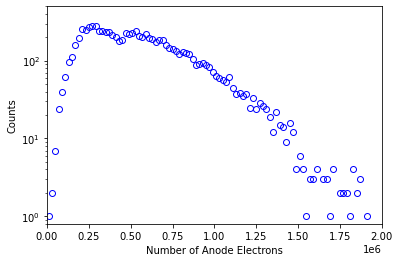

In [17]:
# This next block of code is very similar to the code presented above.  This time,
# however, we imagine that there are 8 photons incident on the photocathode
# instead of one. Now there can be 0, 1, 2, ..., or 8 photoelectrons
# generated and then accelerated towards the first dynode.  How does the
# distribution of electrons arriving at the anode change?  We only require
# a relatively minor change to the code to study this problem.  Plot the
# histograms using the same scale and the same binwidths to make comparisons
# with the previous results easy.
QE = 0.23 # Set the quantum efficeincy of the photocathode
maxi = int(1e4) # Set the number of Monte Carlo iterations
dynode = [0, 150, 300, 450, 600, 750, 850] # Set the number of dynodes and
# their voltages
numPhotons = 8 # Set the number of photons incident on the photocathode.
dist = []
print(datetime.now()) # Print the time at the simulation was started
for i in range(maxi): # This loop runs the Monte Carlo simulation maxi times
    # (10,000 in this case)
    pe = 0 # Set the initial number of photoelectrons to zero.
    for k in range(numPhotons): # This loop individually steps through each of the
        # photons incident on the photocathode
        if np.random.uniform() < QE: # Generate a random number between [0, 1] and check to see
        # if it's greater than the quantum efficiency
            pe += 1 # Increment pe by one every time a photoelectron is
            # produced
    if pe > 0: # If there are any photoelectrons, then do something.  If there
        # are not photoelectrons then do nothing
        electrons = pe # Set the initial number of electrons equal to the
        # number of photoelectrons
        for j in range(len(dynode)-1): # This loop will examine the secondary
            # electrons produced at each of the dynodes
            mu = electrons*(dynode[j+1]-dynode[j])/20; # Mean number of
            # electrons generated at a dynode determined from the number of
            # incoming electons and the energy of the incoming electrons.
            # One electron accelerated through 20 V will on anverage produce
            # one electron
            electrons = electrons + np.random.poisson(mu)
        dist = dist + [electrons] # Add the total number of electrons detected at
        # the anode for this trial to a 'dist' list.
print(datetime.now()) # Print the time at the simulation completed.  
print('The fraction of trials that produced photoelectrons is', len(dist)/maxi)
 # Determines what fraction of maxi trials actually
# produced electrons at the PMT anode.  
print('The mean of the distribution was', statistics.mean(dist))
# Calculate the mean of the distribution
plt.figure() # Generate a new figure
xbins = np.linspace(0, 2e6, 101) # Set bin ranges for the histogram.
# 100 equally-sized bins fron 0 to 2e6.
plt.hist(dist, xbins, color = 'c', edgecolor = 'k') # Plot the histgram of the 
# simulated number of anode electrons
plt.xlim((0, 2e6))
plt.ylim((0, 500))
plt.xlabel('Number of Anode Electons')
plt.ylabel('Counts')
counts, edges = np.histogram(dist, xbins) # Here we use 'np.histogram' to have 
# Python tell us how many counts there are in each of our 100 bins.
# Calculate the centre positions of the bins from the edge locations.
spacing = (edges[1] - edges[0])/2
centres = edges[1:] - spacing
plt.figure() # Start a new figure.
plt.semilogy(centres, counts, 'bo', fillstyle = 'none') # Make a semi-log plot 
# of the counts versus the number of detected anode electrons
plt.xlim((0, 2e6))
plt.ylim((.8, 500))
plt.xlabel('Number of Anode Electrons')
plt.ylabel('Counts');

2021-03-11 11:25:35.795103
Iteration 0
The fraction of trials that produced photoelectrons is 0.2217
The mean of the distribution was 262444.55435272894
2021-03-11 11:25:35.842940
Iteration 1
The fraction of trials that produced photoelectrons is 0.4072
The mean of the distribution was 302301.53806483303
2021-03-11 11:25:36.061257
Iteration 2
The fraction of trials that produced photoelectrons is 0.6407
The mean of the distribution was 378459.22553457157
2021-03-11 11:25:36.291688
Iteration 3
The fraction of trials that produced photoelectrons is 0.8822
The mean of the distribution was 560186.1229879846
2021-03-11 11:25:36.651354


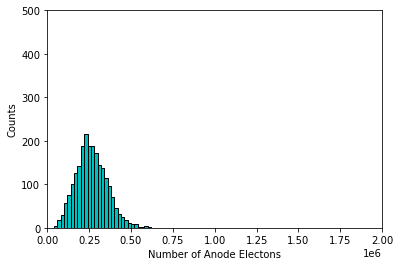

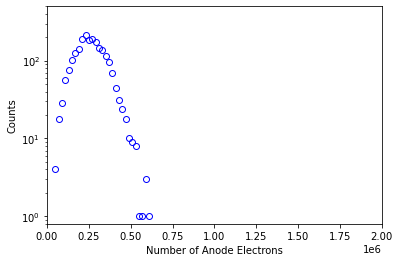

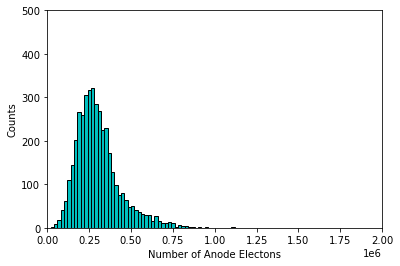

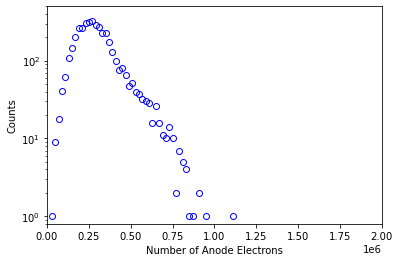

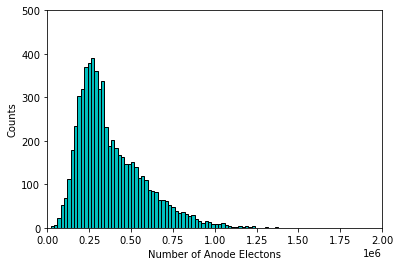

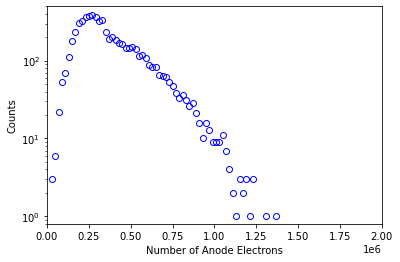

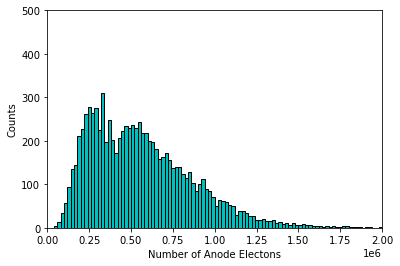

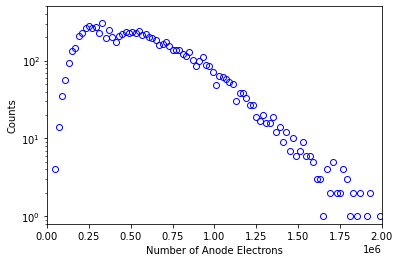

In [19]:
# Finally, this last block of code runs the same PMT simulation above four
# times, each time using a different number of incoming photons [1, 2, 4, 8].
# This chunk of code doesn't rely on anything that came before it.  These 44 lines
# of code will simulate the expected distributions of anode electrons for 4
# difference sets of incoming photons.  There real virtue of the Monte Carlo
# simulation is that we can now vary properties of the PMT with trivial
# modifications to the code below and systematically study the effects.
# For example, what if there were mode dynodes?  All we have to do is modify
# the line dynode:=[0,150,300,450,600,750,800].  Alternatively, we could
# keep the number of dynodes fixed and modify the potential applied to the
# dynodes.  Of course, after making this relatively simple simulation work,
# we could make modifications to make it more sophisticated.  What if 8
# photons are directed towards the photocathode, but they arrive at slightly
# different times.  What does the current pulse at the anode look like?
# That's not a problem that we'll tackle here, but it does demonstrate the
# versitility of the Monte Carlo method.
QE = 0.23 # Set the quantum efficeincy of the photocathode
maxi = int(1e4) # Set the number of Monte Carlo iterations
dynode = [0, 150, 300, 450, 600, 750, 850] # Set the number of dynodes and
# their voltages
numPhotons = [1, 2, 4, 8] # Set the number of photons incident on the
# photocathode.  We will repeat the simulation for 4 different numners of
# incoming photons
print(datetime.now()) # Print the time at the simulation was started
eventsList = []
distList = []
for m in range (len(numPhotons)):
    dist = []
    plt.figure() # Generate a new figure
    for i in range(maxi): # This loop runs the Monte Carlo simulation maxi times
    # (10,000 in this case)
        pe = 0 # Set the initial number of photoelectrons to zero.
        for k in range (numPhotons[m]): # This loop individually steps through each of the
        # photons incident on the photocathode
            if np.random.uniform() < QE: # Generate a random number between [0, 1]
            # and check to see if it's greater than the quantum efficiency
                pe += 1 # Increment pe by one every time a photoelectron is
                # produced
        if pe > 0: # If there are any photoelectrons, then do something.  If there
        # are not photoelectrons then do nothing
            electrons = pe # Set the initial number of electrons equal to the
            # number of photoelectrons
            for j in range(len(dynode)-1): # This loop will examine the secondary
            # electrons produced at each of the dynodes
                mu = electrons*(dynode[j+1]-dynode[j])/20 # Mean number of
                # electrons generated at a dynode determined from the number of
                # incoming electons and the energy of the incoming electrons.
                # One electron accelerated through 20 V will on anverage produce
                # one electron
                electrons = electrons + np.random.poisson(mu)
            dist = dist + [electrons] # Add the total number of electrons detected at
            # the anode for this trial to a 'dist' list.
    # This code can take some time to execute, so provide some intermediate
    # outputs to track progress
    print('Iteration', m)
    print('The fraction of trials that produced photoelectrons is', len(dist)/maxi)
    # Determines what fraction of maxi trials actually
    # produced electrons at the PMT anode.
    print('The mean of the distribution was', statistics.mean(dist))
    # Calculate the mean of the distribution
    print(datetime.now()) # Print the time that this iteration of  the simulation completed
    eventsList = eventsList + [[numPhotons[m], len(dist)/maxi]] # Keep track of
    # how many sets of incident photons actually resulted in a signal at
    # the anode.
    distList = distList + [dist] # Store the distributions recorded into a set
    xbins = xbins = np.linspace(0, 2e6, 101) # Set bin ranges for the histogram.
    # 100 equally-sized bins fron 0 to 2e6.
    plt.hist(dist, xbins, color = 'c', edgecolor = 'k') 
    #Plot the histgram of the simulated number of anode electrons
    plt.xlim((0, 2e6))
    plt.ylim((0, 500))
    plt.xlabel('Number of Anode Electons')
    plt.ylabel('Counts')
    counts, edges = np.histogram(dist, xbins) # Here we use 'np.histogram' to have 
    # Python tell us how many counts there are in each of our 100 bins.
    # Calculate the centre positions of the bins from the edge locations.
    spacing = (edges[1] - edges[0])/2
    centres = edges[1:] - spacing
    plt.figure() # Start a new figure.
    plt.semilogy(centres, counts, 'bo', fillstyle = 'none') # Make a semi-log plot 
    # of the counts versus the number of detected anode electrons    
    plt.xlim((0, 2e6))
    plt.ylim((0.8, 500))
    plt.xlabel('Number of Anode Electrons')
    plt.ylabel('Counts');

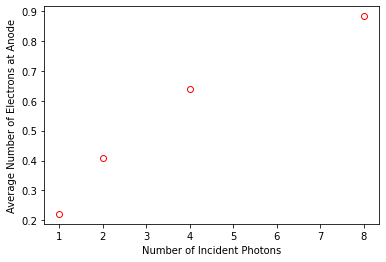

In [20]:
# Using the data stored in 'eventsSet', generate a plot of the average number
# of electrons detected at the anode versus the number of photons incident
# on the photocathode.
y = []
for i in range(len(eventsList)):
    y = y + [eventsList[i][1]]
plt.plot(numPhotons, y, 'ro', linewidth = 2, fillstyle = 'none')
plt.xlabel('Number of Incident Photons')
plt.ylabel('Average Number of Electrons at Anode');

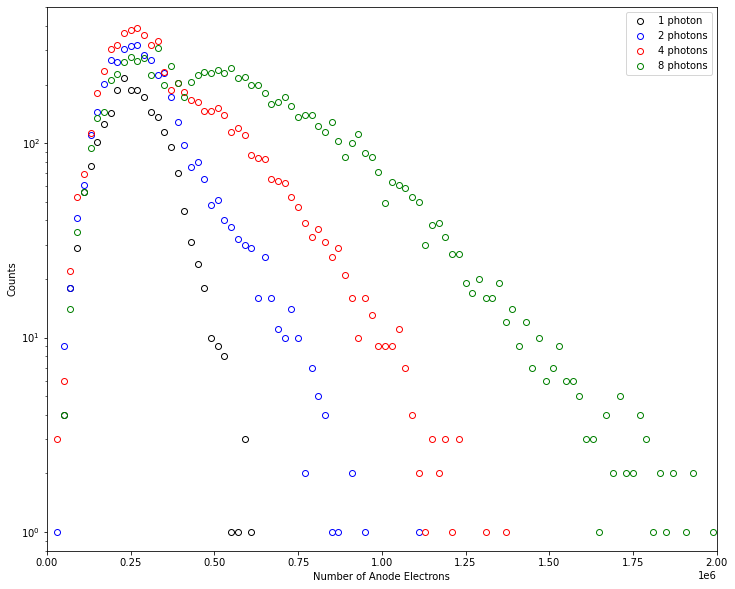

In [21]:
# Finally, using the distributions stored in the set 'distSet', plot the
# simulated distributions for the different numbers of incident photons all on
# the same semi-log plot.
plt.figure(figsize=(12,10))
colours = ['ko', 'bo', 'ro', 'go']
for i in range(len(numPhotons)):
     counts, edges = np.histogram(distList[i], xbins) 
     spacing = (edges[1] - edges[0])/2
     centres = edges[1:] - spacing
     plt.semilogy(centres, counts, colours[i], fillstyle = 'none', linewidth = 2)
plt.xlim((0, 2e6))
plt.ylim((0.8, 500))
plt.xlabel('Number of Anode Electrons')
plt.ylabel('Counts')
plt.legend(('1 photon', '2 photons', '4 photons', '8 photons'));